# Modelos de Regressão

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, precision_recall_fscore_support, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [3]:
ind_vars = pd.read_csv('./code_metrics.csv', index_col='question')
ind_vars

,complexity,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,h1,h2,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1002,1.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,2.0,6.0,...,2.0,1.0,1.0,2.0,1,3,6,12.0,2.0,6.000000
1020,1.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,3.0,8.0,...,4.0,1.0,1.0,4.0,1,3,6,5.0,1.0,2.166667
1023,1.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,6.0,...,2.0,1.0,1.0,2.0,1,3,6,19.0,2.0,8.333333
1025,1.0,10.0,6.0,6.0,3.0,3.0,0.0,1.0,2.0,6.0,...,3.0,1.0,1.0,3.0,1,3,5,11.0,1.0,5.400000
1027,1.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,2.0,7.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,7.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,4.0,31.0,16.0,15.0,2.0,2.0,5.0,9.0,1.0,2.0,...,8.0,0.0,2.0,2.0,3,2,11,9.0,1.0,5.181818
3229,1.0,13.0,7.0,8.0,3.0,2.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0,3,9,7.0,1.0,4.555556
3309,1.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,2.0,7.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,5.0,8.000000


In [4]:
dep_vars = pd.read_csv('./question_info.csv', index_col='question')
dep_vars

,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
question,,,,,,,,,,,,,
1002,1.000000,1.250000,0.800000,8.062500,9.312500,0.250000,0.125000,0.125000,72.625000,7.812500,0.000000,2.0,151.750000
1020,0.900000,6.750000,0.133333,18.000000,24.750000,5.850000,1.350000,4.500000,820.450000,123.950000,88.009611,14.0,537.250000
1023,0.937500,3.187500,0.294118,12.000000,15.187500,2.250000,1.875000,0.375000,451.312500,57.625000,55.753800,2.0,408.187500
1025,0.944444,1.777778,0.531250,13.166667,14.944444,0.833333,0.444444,0.388889,310.388889,39.055556,0.000000,5.0,494.166667
1027,0.892857,5.517857,0.161812,22.732143,28.250000,4.625000,1.357143,3.267857,955.035714,65.392857,164.854140,26.0,371.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,0.437500,3.437500,0.127273,15.312500,18.750000,3.000000,1.000000,2.000000,2008.687500,116.187500,172.408286,13.0,793.062500
3229,1.000000,1.609756,0.621212,2.121951,3.731707,0.609756,0.121951,0.487805,147.975610,12.902439,105.147439,7.0,53.878049
3309,0.826087,9.304348,0.088785,20.521739,29.826087,8.478261,2.869565,5.608696,1505.260870,88.086957,57.915579,8.0,358.826087


In [5]:
dep_vars.describe()

,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.768603,4.877978,0.200366,15.889998,20.767976,4.109375,2.663183,1.446192,869.244404,102.518810,397.713690,13.873418,579.331652
std,0.141802,2.350548,0.114787,6.311456,7.690589,2.406738,1.999373,1.036958,372.329599,44.231145,322.580822,9.798175,390.697477
min,0.241379,1.250000,0.027397,2.121951,3.731707,0.250000,0.121951,0.000000,72.625000,7.812500,0.000000,1.000000,48.812500
25%,0.683014,3.099507,0.115037,11.478778,14.881250,2.240669,1.275253,0.705882,613.930901,72.346296,131.568562,7.000000,356.526316
50%,0.795455,4.370370,0.173077,14.909091,20.100000,3.638889,2.043478,1.161290,808.418605,97.571429,290.536409,12.000000,499.690722
75%,0.873214,6.090054,0.256918,19.607071,25.188578,5.347500,3.655308,1.903890,1064.742308,123.700000,637.510291,17.000000,720.770687
max,1.000000,18.250000,0.800000,56.375000,62.375000,17.750000,13.200000,8.055556,2518.789474,263.894737,1495.655429,56.000000,4458.157895


## Distribuição de frequência

Text(0, 0.5, 'Frequência')

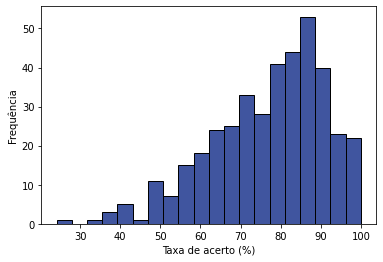

In [7]:
hst = sns.histplot(data=dep_vars['taxa_acerto'] * 100.0, bins=20)
sns.set_palette('dark')
hst.set_xlabel('Taxa de acerto (%)')
hst.set_ylabel('Frequência')

Text(0, 0.5, 'Frequência')

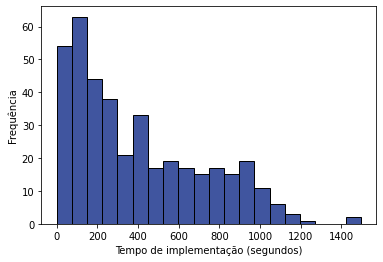

In [12]:
hst = sns.histplot(data=dep_vars['tempo_implementacao'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Tempo de implementação (segundos)')
hst.set_ylabel('Frequência')

Text(0, 0.5, 'Frequência')

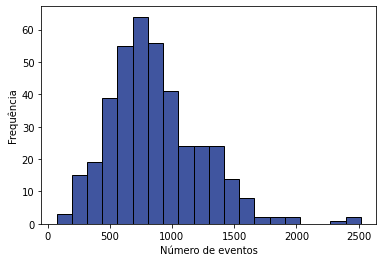

In [10]:
hst = sns.histplot(data=dep_vars['num_eventos'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Número de eventos')
hst.set_ylabel('Frequência')

Text(0, 0.5, 'Frequência')

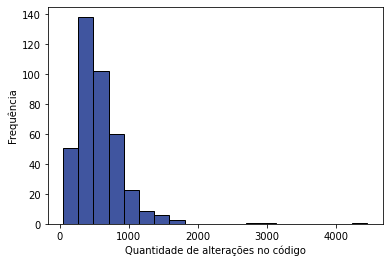

In [11]:
hst = sns.histplot(data=dep_vars['qtd_alteracoes_codigo'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Quantidade de alterações no código')
hst.set_ylabel('Frequência')

## Funções auxiliares

In [6]:
# Classificador de questões
def ternary_classify(rows, bounds, reverse=False):
    if len(bounds) != 2:
        raise Exception('quartiles must have 2 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'medio', 'dificil')
    if reverse:
        values = values[::-1]
    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1] if row <= bounds[1] else
                      values[2]
                     )
    
def get_bounds_ternary(rows, column_name):
    if column_name == 'taxa_acerto':
        # Classificação do INEP
        return (0.6, 0.85)
    else:
        return np.quantile(rows, q=[1/3, 2/3], interpolation='midpoint')

In [ ]:
# Classificador de questões
def binary_classify(rows, bounds, reverse=False):
    if len(bounds) != 1:
        raise Exception('quartiles must have 1 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'dificil')
    if reverse:
        values = values[::-1]
    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1]
                     )
    
def get_bounds_binary(rows, column_name):
    if column_name == 'taxa_acerto':
        # Classificação do INEP
        return (0.6,)
    else:
        return np.quantile(rows, q=[0.5], interpolation='midpoint')

In [ ]:
# def reg_simple_train(ind_vars, y, model, binary = False):
#     bounds_fn = get_bounds_binary if binary else get_bounds_ternary
#     classify_fn = binary_classify if binary else ternary_classify
    
#     X_train, X_test, y_train, y_test = train_test_split(ind_vars, y, test_size=0.3, random_state=0)
#     revert = y.name == 'taxa_acerto' or y.name == 'taxa_aceitacao'

#     bounds = bounds_fn(y_train, y_train.name)
#     y_true = classify_fn(y_test, bounds, revert)

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
#     y_pred = pd.Series(y_pred)

#     classified_pred = classify_fn(y_pred, bounds, revert)

#     mse = mean_squared_error(y_test, y_pred)
#     prec = precision_score(y_true, classified_pred, average='micro')
#     acc = accuracy_score(y_true, classified_pred)
#     rec = recall_score(y_true, classified_pred, average='micro')
#     f1 = f1_score(y_true, classified_pred, average='micro')
    
#     return {
#         'mean_squared_error': mse,
#         'precision': prec,
#         'accuracy': acc,
#         'recall': rec,
#         'f1_score': f1,
#     }

In [7]:
binary = False

In [8]:
def relative_squared_error(y_true, y_pred):
    return np.sum(np.square(np.subtract(y_true,y_pred))) / np.sum(np.square(np.subtract(y_true, np.mean(y_true))))

def relative_absolute_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true - np.mean(y_true))))

def r2_adjusted(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

In [9]:
def cross_val_train(ind_vars, y, model, binary_class):    
    bounds_fn = get_bounds_binary if binary_class else get_bounds_ternary
    classify_fn = binary_classify if binary_class else ternary_classify
    
    predicted_list = []
    tested_list = []
    
    cat_predicted_list = []
    cat_tested_list = []
    
#     final_scores = { 'relative_squared_error': 0.0 }
    
    n_folds = 4
    kf = KFold(n_folds, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(ind_vars):
        X_train, X_test = ind_vars.iloc[train_index], ind_vars.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        revert = y_train.name == 'taxa_acerto' or y_train.name == 'taxa_aceitacao'
        
        bounds = bounds_fn(y_train, y_train.name)
        y_true = classify_fn(y_test, bounds, revert)
        
        model.fit(X_train, y_train)
    
        y_pred = pd.Series(model.predict(X_test))
        classified_pred = classify_fn(y_pred, bounds, revert)
        
        predicted_list = np.append(predicted_list, y_pred)
        tested_list = np.append(tested_list, y_test)
        
#         final_scores['relative_squared_error'] += relative_squared_error(y_test.tolist(), y_pred.tolist())
        cat_predicted_list = np.append(cat_predicted_list, classified_pred)
        cat_tested_list = np.append(cat_tested_list, y_true)
    
    final_scores = {}
    final_scores['mae'] = mean_absolute_error(tested_list, predicted_list)
    final_scores['rae'] = relative_absolute_error(tested_list, predicted_list)
    final_scores['rse'] = relative_squared_error(tested_list, predicted_list)
    final_scores['r2'] = r2_score(tested_list, predicted_list)
    
    final_scores['accuracy'] = accuracy_score(cat_tested_list, cat_predicted_list)
    
    precision, recall, f1_micro, _ = precision_recall_fscore_support(cat_tested_list, cat_predicted_list, average='micro')
    final_scores['precision'] = precision
    final_scores['recall'] = recall
    final_scores['f1_micro'] = f1_micro
    final_scores['f1_macro'] = f1_score(cat_tested_list, cat_predicted_list, average='macro')
    
    classes = ('facil', 'dificil') if binary_class else ('facil', 'medio', 'dificil')
    cnf_matrix = confusion_matrix(cat_tested_list, cat_predicted_list, labels=classes)
        
    return final_scores, cnf_matrix

In [10]:
def model_train(df, dep_vars, model, transform_fn = None, transform_by_column = False, binary_class = True):
    results_col = ['mae', 'rae', 'rse', 'r2', 'accuracy', 'precision', 'recall', 'f1_micro', 'f1_macro']
    results_df = pd.DataFrame(0, index=dep_vars.columns, columns=results_col, dtype=np.float32)
    cnf_matrixes = {}
    
    transformed_df = df.copy()
    if transform_fn and not transform_by_column:
        transformed_df = pd.DataFrame(transform_fn(transformed_df))
    
    for col in dep_vars.columns:
        if transform_fn and transform_by_column:
            transformed_df = pd.DataFrame(transform_fn(df, col))
        results_row, cnf_matrix = cross_val_train(transformed_df, dep_vars[col], model, binary)
        results_df.loc[col, :] = results_row
        
        cnf_matrixes[col] = cnf_matrix
        
    return results_df.sort_values(by=['r2', 'f1_micro'], ascending=[False, False]), cnf_matrixes

In [11]:
def model_train_search_cv(
        df, dep_vars, model, model_class, distributions, n_iter,
        transform_fn = None, transform_by_column = False, binary_class = True
    ):
#     results_col = ['rae', 'rse', 'r2', 'precision', 'accuracy', 'recall', 'f1_score']
    results_col = ['mae', 'rae', 'rse', 'r2', 'accuracy', 'precision', 'recall', 'f1_micro', 'f1_macro']
    results = pd.DataFrame(0, index=dep_vars.columns, columns=results_col, dtype=np.float32)
    cnf_matrixes = {}
    
    transformed_df = df.copy()
    if transform_fn and not transform_by_column:
        transformed_df = pd.DataFrame(transform_fn(transformed_df))
        
    for col in dep_vars.columns:
        if transform_fn and transform_by_column:
            transformed_df = pd.DataFrame(transform_fn(df, col))
        
        clf = RandomizedSearchCV(
            estimator=model, 
            param_distributions=distributions, 
            random_state=42, 
            cv=4, 
            n_iter=n_iter, 
            n_jobs=-1,
            scoring='neg_mean_absolute_error',
            return_train_score=True
        )
        
        search = clf.fit(transformed_df, dep_vars[col])
        best_params = { key.split('__')[-1]: value for key, value in search.best_params_.items() }
        print('best params for {}: {}'.format(col, best_params))
        best_model = model_class(**best_params)
        
        metric_train_result, cnf_matrix = cross_val_train(ind_vars, dep_vars[col], best_model, binary_class)
        results.loc[col] = metric_train_result           
        cnf_matrixes[col] = cnf_matrix
        
    return results.sort_values(by=['r2', 'f1_micro'], ascending=False), cnf_matrixes

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cnf_matrix, title, binary = True):
    classes = ['fácil', 'difícil'] if binary else ['fácil', 'médio', 'difícil']
    np.set_printoptions(precision=2)
    
    plt.figure()
    plt.style.use(style='default')
    
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe predita')
    plt.xlabel('Classe verdadeira')
    
    plt.show()

In [13]:
def push_results(results, df_results: pd.DataFrame, model):
    results[model] = dict()
    for dep_var, metrics in df_results.iterrows():
        results[model][dep_var] = metrics

In [14]:
results = dict()

### Regressão linear simples

In [15]:
model = LinearRegression()
# Como não existem hiperparâmetros para a regressão linear, basta chamar a função default
ans, cnf_matrixes_lr = model_train(ind_vars, dep_vars, model, binary_class=binary)
push_results(results, ans, 'Linear Regression')
ans

,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
tempo_implementacao,192.390335,0.709249,0.637848,0.362152,0.567089,0.567089,0.567089,0.567089,0.565231
qtd_alteracoes_codigo,227.005951,0.907659,0.866690,0.133310,0.498734,0.498734,0.498734,0.498734,0.501936
num_eventos,238.254761,0.830544,0.879692,0.120307,0.569620,0.569620,0.569620,0.569620,0.573064
taxa_acerto,0.103073,0.896528,0.913057,0.086943,0.556962,0.556962,0.556962,0.556962,0.445314
num_eventos_del,29.755112,0.875612,0.966261,0.033739,0.521519,0.521519,0.521519,0.521519,0.526475
num_erros_lgcs,1.480620,0.977259,1.017877,-0.017877,0.443038,0.443038,0.443038,0.443038,0.429866
num_erros,1.859804,1.003160,1.095507,-0.095507,0.435443,0.435443,0.435443,0.435443,0.430176
num_submissoes,1.821294,1.006432,1.100080,-0.100080,0.435443,0.435443,0.435443,0.435443,0.426334
taxa_aceitacao,0.089400,1.016195,1.115513,-0.115513,0.437975,0.437975,0.437975,0.437975,0.435574
num_errors_stx,0.776874,1.008131,1.132247,-0.132247,0.481013,0.481013,0.481013,0.481013,0.466456


### Regressão polinomial

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)

model = LinearRegression()
ans, cnf_matrixes_rp2 = model_train(df=ind_vars, dep_vars=dep_vars, model=model, transform_fn=poly.fit_transform, binary_class=binary)
push_results(results, ans, 'Polinomial Regression')
ans

,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
tempo_implementacao,1021.261597,3.764894,71.949234,-70.949234,0.493671,0.493671,0.493671,0.493671,0.487020
qtd_alteracoes_codigo,1669.918457,6.676991,125.261742,-124.261742,0.412658,0.412658,0.412658,0.412658,0.394300
taxa_acerto,0.623866,5.426367,141.490433,-140.490433,0.435443,0.435443,0.435443,0.435443,0.416451
num_testes,27.531271,5.642206,152.881271,-151.881271,0.455696,0.455696,0.455696,0.455696,0.442032
num_eventos,1849.741821,6.448108,162.657715,-161.657715,0.410127,0.410127,0.410127,0.410127,0.390797
num_eventos_del,213.599503,6.285653,172.885162,-171.885162,0.422785,0.422785,0.422785,0.422785,0.417051
num_consultas,36.294754,6.036495,183.990479,-182.990479,0.412658,0.412658,0.412658,0.412658,0.397351
num_erros_lgcs,14.682483,9.690931,464.190979,-463.190979,0.394937,0.394937,0.394937,0.394937,0.367949
num_erros,20.087957,10.835243,661.686279,-660.686279,0.356962,0.356962,0.356962,0.356962,0.334013
num_submissoes,20.095835,11.104790,693.256104,-692.256104,0.356962,0.356962,0.356962,0.356962,0.332097


### Árvore de Regressão

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']
random_state = [42]

distributions = dict(criterion = criterion, splitter = splitter, max_features = max_features, random_state = random_state)
distributions

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'random_state': [42]}

In [19]:
model = DecisionTreeRegressor(random_state=42)
ans, cnf_matrixes_dtr = model_train_search_cv(ind_vars, dep_vars, model, DecisionTreeRegressor, distributions, n_iter=16, binary_class=binary)
push_results(results, ans, 'Regression Tree')
ans

best params for taxa_acerto: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'poisson'}
best params for num_submissoes: {'splitter': 'best', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'

best params for taxa_aceitacao: {'splitter': 'best', 'random_state': 42, 'max_features': 'auto', 'criterion': 'poisson'}
best params for num_testes: {'splitter': 'best', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for num_consultas: {'splitter': 'best', 'random_state': 42, 'max_features': 'log2', 'criterion': 'poisson'}
best params for num_erros: {'splitter': 'best', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'

best params for num_erros_lgcs: {'splitter': 'random', 'random_state': 42, 'max_features': 'auto', 'criterion': 'squared_error'}
best params for num_errors_stx: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'absolute_error'}
best params for num_eventos: {'splitter': 'best', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for num_eventos_del: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'

best params for tempo_implementacao: {'splitter': 'random', 'random_state': 42, 'max_features': 'auto', 'criterion': 'squared_error'}
best params for num_std_sem_submissao: {'splitter': 'best', 'random_state': 42, 'max_features': 'log2', 'criterion': 'poisson'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'

best params for qtd_alteracoes_codigo: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'absolute_error'}


,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
tempo_implementacao,177.663040,0.654957,0.627052,0.372948,0.605063,0.605063,0.605063,0.605063,0.607747
num_eventos,261.112885,0.910227,0.908953,0.091047,0.577215,0.577215,0.577215,0.577215,0.576807
num_eventos_del,33.183773,0.976508,0.991915,0.008085,0.559494,0.559494,0.559494,0.559494,0.559467
num_testes,4.681752,0.959469,1.007709,-0.007709,0.501266,0.501266,0.501266,0.501266,0.502789
qtd_alteracoes_codigo,233.089142,0.931982,1.060747,-0.060747,0.574684,0.574684,0.574684,0.574684,0.574066
num_std_sem_submissao,7.600338,1.035038,1.125621,-0.125621,0.473418,0.473418,0.473418,0.473418,0.468419
taxa_acerto,0.112743,0.980636,1.125671,-0.125671,0.531646,0.531646,0.531646,0.531646,0.473117
num_consultas,6.271427,1.043055,1.235094,-0.235094,0.473418,0.473418,0.473418,0.473418,0.473799
taxa_aceitacao,0.095303,1.083289,1.335924,-0.335924,0.430380,0.430380,0.430380,0.430380,0.428756
num_errors_stx,0.926084,1.201757,1.532653,-0.532653,0.422785,0.422785,0.422785,0.422785,0.423330


### SVR

In [20]:
from sklearn.svm import SVR

In [21]:
kernel = ['rbf', 'poly']
degree = [2,3]
tol = np.linspace(start=1e-5, stop=1e-3, num=10)
epsilon = np.linspace(start=1e-3, stop=1, num=10)
C = np.linspace(start=1, stop=1000, num=10)

distributions = dict(
    kernel = kernel,
    degree = degree,
    tol = tol,
    epsilon = epsilon,
    C = C,
)
distributions

{'kernel': ['rbf', 'poly'],
 'degree': [2, 3],
 'tol': array([1.0e-05, 1.2e-04, 2.3e-04, 3.4e-04, 4.5e-04, 5.6e-04, 6.7e-04,
        7.8e-04, 8.9e-04, 1.0e-03]),
 'epsilon': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
        1.   ]),
 'C': array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
        1000.])}

In [22]:
model = SVR()

In [23]:
ans, cnf_matrixes_svr = model_train_search_cv(ind_vars, dep_vars, model, SVR, distributions, 50, binary_class=binary)
push_results(results, ans, 'SVR')
ans

best params for taxa_acerto: {'tol': 0.0005600000000000001, 'kernel': 'rbf', 'epsilon': 0.001, 'degree': 3, 'C': 1.0}
best params for num_submissoes: {'tol': 1e-05, 'kernel': 'poly', 'epsilon': 0.334, 'degree': 2, 'C': 1.0}
best params for taxa_aceitacao: {'tol': 0.0005600000000000001, 'kernel': 'rbf', 'epsilon': 0.001, 'degree': 3, 'C': 1.0}
best params for num_testes: {'tol': 0.00067, 'kernel': 'poly', 'epsilon': 0.778, 'degree': 2, 'C': 445.0}
best params for num_consultas: {'tol': 0.001, 'kernel': 'rbf', 'epsilon': 0.556, 'degree': 2, 'C': 1.0}
best params for num_erros: {'tol': 1e-05, 'kernel': 'poly', 'epsilon': 0.334, 'degree': 2, 'C': 1.0}
best params for num_erros_lgcs: {'tol': 0.001, 'kernel': 'poly', 'epsilon': 0.889, 'degree': 2, 'C': 1.0}
best params for num_errors_stx: {'tol': 0.00012, 'kernel': 'poly', 'epsilon': 0.334, 'degree': 2, 'C': 112.0}
best params for num_eventos: {'tol': 0.00067, 'kernel': 'poly', 'epsilon': 0.223, 'degree': 2, 'C': 667.0}
best params for num_e

,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
qtd_alteracoes_codigo,204.558273,0.817904,0.728492,0.271508,0.425316,0.425316,0.425316,0.425316,0.329764
num_eventos_del,29.496435,0.868000,0.769011,0.230989,0.427848,0.427848,0.427848,0.427848,0.330804
tempo_implementacao,216.943192,0.799764,0.784624,0.215376,0.448101,0.448101,0.448101,0.448101,0.413357
num_eventos,246.587585,0.859592,0.791742,0.208258,0.425316,0.425316,0.425316,0.425316,0.333818
taxa_acerto,0.105425,0.916984,0.895699,0.104301,0.541772,0.541772,0.541772,0.541772,0.328764
num_consultas,5.730822,0.953143,0.924413,0.075587,0.372152,0.372152,0.372152,0.372152,0.262741
taxa_aceitacao,0.080278,0.912501,0.971997,0.028003,0.379747,0.379747,0.379747,0.379747,0.333644
num_erros_lgcs,1.386107,0.914877,0.982077,0.017923,0.364557,0.364557,0.364557,0.364557,0.261521
num_erros,1.758120,0.948313,1.006403,-0.006403,0.336709,0.336709,0.336709,0.336709,0.209945
num_submissoes,1.727202,0.954437,1.018147,-0.018146,0.326582,0.326582,0.326582,0.326582,0.201870


### NuSVR

In [24]:
from sklearn.svm import NuSVR

In [25]:
nu = np.linspace(start=0.1, stop=0.5, num=10)
C = np.linspace(start=1, stop=100, num=10)
kernel = ['rbf', 'poly']
degree = [2,3]
         
distributions = dict(
    nu = nu,
    C = C,
    kernel = kernel,
    degree = degree,
)
distributions 

{'nu': array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
        0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ]),
 'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
 'kernel': ['rbf', 'poly'],
 'degree': [2, 3]}

In [26]:
model = NuSVR()

In [27]:
ans, cnf_matrixes_nsvr = model_train_search_cv(ind_vars, dep_vars, model, NuSVR, distributions, 50, binary_class=binary)
push_results(results, ans, 'NuSVR')
ans

best params for taxa_acerto: {'nu': 0.3666666666666667, 'kernel': 'poly', 'degree': 2, 'C': 12.0}
best params for num_submissoes: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 1.0}
best params for taxa_aceitacao: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 1.0}
best params for num_testes: {'nu': 0.3666666666666667, 'kernel': 'poly', 'degree': 2, 'C': 100.0}
best params for num_consultas: {'nu': 0.23333333333333334, 'kernel': 'poly', 'degree': 2, 'C': 45.0}
best params for num_erros: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 1.0}
best params for num_erros_lgcs: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 1.0}
best params for num_errors_stx: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 1.0}
best params for num_eventos: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 89.0}
best params for num_eventos_del: {'nu': 0.3666666666666667, 'kernel': 'poly', 'degree': 2, 'C': 100.0}
best params for tempo_implementacao: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 89.0}
best params f

,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
num_eventos_del,30.117413,0.886274,0.789170,0.210830,0.425316,0.425316,0.425316,0.425316,0.329457
num_eventos,252.090469,0.878775,0.850297,0.149703,0.422785,0.422785,0.422785,0.422785,0.335729
qtd_alteracoes_codigo,218.674347,0.874346,0.865693,0.134307,0.415190,0.415190,0.415190,0.415190,0.326940
tempo_implementacao,248.789764,0.917167,0.886615,0.113385,0.392405,0.392405,0.392405,0.392405,0.294178
taxa_acerto,0.104605,0.909849,0.896911,0.103089,0.539240,0.539240,0.539240,0.539240,0.311461
num_testes,4.624183,0.947671,0.915258,0.084742,0.382278,0.382278,0.382278,0.382278,0.293308
num_consultas,5.772892,0.960140,0.917692,0.082308,0.384810,0.384810,0.384810,0.384810,0.274458
num_std_sem_submissao,6.765089,0.921291,0.954710,0.045290,0.374684,0.374684,0.374684,0.374684,0.311171
num_erros_lgcs,1.390981,0.918094,0.967466,0.032534,0.384810,0.384810,0.384810,0.384810,0.291667
taxa_aceitacao,0.080919,0.919798,0.969706,0.030294,0.372152,0.372152,0.372152,0.372152,0.304807


### Random Forest

In [28]:
n_estimators = np.linspace(start=100, stop=1000, num=10, dtype=int)
criterion = ['squared_error', 'absolute_error', 'poisson']
max_features = ['sqrt', 'log2', None]
random_state = [42]

distributions = dict(
    n_estimators = n_estimators,
    criterion = criterion,
    max_features = max_features,
    random_state = random_state
)
distributions

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'criterion': ['squared_error', 'absolute_error', 'poisson'],
 'max_features': ['sqrt', 'log2', None],
 'random_state': [42]}

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor()

In [31]:
ans, cnf_matrixes_rfr = model_train_search_cv(ind_vars, dep_vars, model, RandomForestRegressor, distributions, 50, binary_class=binary)
push_results(results, ans, 'Random Forest')
ans

best params for taxa_acerto: {'random_state': 42, 'n_estimators': 400, 'max_features': 'sqrt', 'criterion': 'squared_error'}
best params for num_submissoes: {'random_state': 42, 'n_estimators': 400, 'max_features': 'log2', 'criterion': 'poisson'}
best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'squared_error'}
best params for num_testes: {'random_state': 42, 'n_estimators': 400, 'max_features': 'sqrt', 'criterion': 'absolute_error'}
best params for num_consultas: {'random_state': 42, 'n_estimators': 100, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_erros: {'random_state': 42, 'n_estimators': 900, 'max_features': 'log2', 'criterion': 'poisson'}
best params for num_erros_lgcs: {'random_state': 42, 'n_estimators': 100, 'max_features': 'log2', 'criterion': 'squared_error'}
best params for num_errors_stx: {'random_state': 42, 'n_estimators': 100, 'max_features': 'log2', 'criterion': 'poisson'}
best 

,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
tempo_implementacao,145.589890,0.536719,0.363219,0.636781,0.640506,0.640506,0.640506,0.640506,0.643342
qtd_alteracoes_codigo,170.103317,0.680140,0.509548,0.490452,0.612658,0.612658,0.612658,0.612658,0.618514
num_eventos,193.959656,0.676134,0.522896,0.477104,0.602532,0.602532,0.602532,0.602532,0.608851
num_eventos_del,24.484089,0.720500,0.546439,0.453561,0.610127,0.610127,0.610127,0.610127,0.615570
taxa_acerto,0.085374,0.742580,0.610173,0.389827,0.617721,0.617721,0.617721,0.617721,0.479677
num_testes,3.749094,0.768332,0.653353,0.346647,0.531646,0.531646,0.531646,0.531646,0.528879
num_consultas,4.648482,0.773129,0.659068,0.340932,0.518987,0.518987,0.518987,0.518987,0.511780
num_std_sem_submissao,6.177338,0.841249,0.751902,0.248098,0.493671,0.493671,0.493671,0.493671,0.483153
num_erros_lgcs,1.286686,0.849256,0.808251,0.191749,0.486076,0.486076,0.486076,0.486076,0.449691
taxa_aceitacao,0.076015,0.864048,0.841368,0.158632,0.435443,0.435443,0.435443,0.435443,0.428187


### XGB

In [32]:
from xgboost import XGBRegressor

In [33]:
model = XGBRegressor()

In [34]:
n_estimators = np.linspace(start=100, stop=500, num=10, dtype=int)
max_depth = np.linspace(start=3, stop=15, num=15, dtype=int)
eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsample = np.linspace(start=0.1, stop=1.0, num=10, dtype=np.float32)
distributions = dict(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample)
distributions

{'n_estimators': array([100, 144, 188, 233, 277, 322, 366, 411, 455, 500]),
 'max_depth': array([ 3,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 13, 14, 15]),
 'eta': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ], dtype=float32)}

In [35]:
ans, cnf_matrixes_xbgr = model_train_search_cv(ind_vars, dep_vars, model, XGBRegressor, distributions, 50, binary_class=binary)
push_results(results, ans, model='Extreme Gradient Boosting')
ans

best params for taxa_acerto: {'subsample': 0.2, 'n_estimators': 411, 'max_depth': 3, 'eta': 0.01}
best params for num_submissoes: {'subsample': 0.5, 'n_estimators': 277, 'max_depth': 6, 'eta': 0.01}
best params for taxa_aceitacao: {'subsample': 0.3, 'n_estimators': 500, 'max_depth': 3, 'eta': 0.01}
best params for num_testes: {'subsample': 0.2, 'n_estimators': 411, 'max_depth': 3, 'eta': 0.01}
best params for num_consultas: {'subsample': 0.2, 'n_estimators': 411, 'max_depth': 3, 'eta': 0.01}
best params for num_erros: {'subsample': 0.7, 'n_estimators': 188, 'max_depth': 15, 'eta': 0.01}
best params for num_erros_lgcs: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'eta': 0.01}
best params for num_errors_stx: {'subsample': 0.8, 'n_estimators': 144, 'max_depth': 12, 'eta': 0.01}
best params for num_eventos: {'subsample': 0.2, 'n_estimators': 411, 'max_depth': 3, 'eta': 0.01}
best params for num_eventos_del: {'subsample': 0.2, 'n_estimators': 411, 'max_depth': 3, 'eta': 0.01}
bes

,mae,rae,rse,r2,accuracy,precision,recall,f1_micro,f1_macro
tempo_implementacao,146.147217,0.538774,0.358894,0.641106,0.637975,0.637975,0.637975,0.637975,0.636998
num_eventos,195.576706,0.681771,0.533452,0.466548,0.612658,0.612658,0.612658,0.612658,0.620243
num_eventos_del,24.892645,0.732523,0.555283,0.444717,0.544304,0.544304,0.544304,0.544304,0.551515
qtd_alteracoes_codigo,170.150620,0.680329,0.586822,0.413178,0.625316,0.625316,0.625316,0.625316,0.627668
taxa_acerto,0.088994,0.774070,0.635674,0.364326,0.589873,0.589873,0.589873,0.589873,0.407293
num_testes,3.822953,0.783469,0.683187,0.316813,0.506329,0.506329,0.506329,0.506329,0.506251
num_consultas,4.858894,0.808125,0.703556,0.296444,0.488608,0.488608,0.488608,0.488608,0.480560
num_std_sem_submissao,6.116052,0.832903,0.811756,0.188244,0.536709,0.536709,0.536709,0.536709,0.538920
taxa_aceitacao,0.078033,0.886988,0.866411,0.133589,0.440506,0.440506,0.440506,0.440506,0.425178
num_submissoes,1.568039,0.866485,0.886132,0.113868,0.458228,0.458228,0.458228,0.458228,0.458548


## Resultados

In [41]:
n, k = ind_vars.shape[0], dep_vars.shape[1]
columns = ['classificador', 'r2_adjusted', 'mae', 'rae', 'rse', 'r2', 'precision', 'accuracy', 'recall', 'f1_micro', 'f1_macro']
best_metrics = pd.DataFrame(-np.inf, index=dep_vars.columns, columns=columns)
for model, metrics in results.items():
    for metric, data in metrics.items():
        cur = best_metrics.loc[metric]
        r2_adjusted_score = r2_adjusted(data['r2'], n, k)
        if r2_adjusted_score > cur['r2_adjusted']:
            best_metrics.loc[metric] = model, r2_adjusted_score, *data
best_metrics.sort_values(by=['r2_adjusted'], ascending=False)

,classificador,r2_adjusted,mae,rae,rse,r2,precision,accuracy,recall,f1_micro,f1_macro
tempo_implementacao,Extreme Gradient Boosting,0.628860,146.147217,0.538774,0.358894,0.641106,0.637975,0.637975,0.637975,0.637975,0.636998
qtd_alteracoes_codigo,Random Forest,0.473066,170.103317,0.680140,0.509548,0.490452,0.612658,0.612658,0.612658,0.612658,0.618514
num_eventos,Random Forest,0.459263,193.959656,0.676134,0.522896,0.477104,0.602532,0.602532,0.602532,0.602532,0.608851
num_eventos_del,Random Forest,0.434917,24.484089,0.720500,0.546439,0.453561,0.610127,0.610127,0.610127,0.610127,0.615570
taxa_acerto,Random Forest,0.369007,0.085374,0.742580,0.610173,0.389827,0.617721,0.617721,0.617721,0.617721,0.479677
num_testes,Random Forest,0.324354,3.749094,0.768332,0.653353,0.346647,0.531646,0.531646,0.531646,0.531646,0.528879
num_consultas,Random Forest,0.318444,4.648482,0.773129,0.659068,0.340932,0.518987,0.518987,0.518987,0.518987,0.511780
num_std_sem_submissao,Random Forest,0.222443,6.177338,0.841249,0.751902,0.248098,0.493671,0.493671,0.493671,0.493671,0.483153
num_erros_lgcs,Random Forest,0.164171,1.286686,0.849256,0.808251,0.191749,0.486076,0.486076,0.486076,0.486076,0.449691
taxa_aceitacao,Random Forest,0.129924,0.076015,0.864048,0.841368,0.158632,0.435443,0.435443,0.435443,0.435443,0.428187


In [ ]:
columns = ['classificador', 'rae', 'rse', 'r2', 'precision', 'accuracy', 'recall', 'f1_score']
best_metrics = pd.DataFrame(-np.inf, index=dep_vars.columns, columns=columns)
for model, metrics in results.items():
    for metric, data in metrics.items():
        cur = best_metrics.loc[metric]
        if data['r2'] > cur['r2']:
            best_metrics.loc[metric] = model, *data
best_metrics.sort_values(by=['r2'], ascending=False)

In [ ]:
plot_confusion_matrix(cnf_matrixes_rfr['tempo_implementacao'], '', binary=binary)